# Lab 04 : Test set evaluation -- demo

In [1]:
import sys, os

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [4]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()

train_data = torch.load(data_path+'mnist/train_data.pt')
train_label = torch.load(data_path+'mnist/train_label.pt')
test_data = torch.load(data_path+'mnist/test_data.pt')
test_label = torch.load(data_path+'mnist/test_label.pt')

### Make a ONE layer net class

In [6]:
class one_layer_net(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias = False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [7]:
net = one_layer_net(784, 10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [10]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)

bs = 200

### Do 30 passes through the training set

In [11]:
for epoch in range(30):
    
    running_loss = 0
    running_error = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(60000)
    
    for count in range(0, 60000, bs):
        
        optimizer.zero_grad()
        
        indices = shuffled_indices[count:count+bs]
        minibatch_data = train_data[indices]
        minibatch_label = train_label[indices]
        
        inputs = minibatch_data.view(bs, 784)
        
        inputs.requires_grad_()
        
        scores = net(inputs)
        
        loss = criterion(scores, minibatch_label)
        
        loss.backward()
        
        optimizer.step()
        
        # compute and accumulate stats
        
        running_loss += loss.detach().item()
        
        error = utils.get_error(scores.detach(), minibatch_label)
        running_error += error.item()
        
        num_batches += 1
    
    # compute stats for the full training set
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    
    print('epoch= ', epoch, '\t loss= ', total_loss, '\t error = ', total_error*100, 'percent')

epoch=  0 	 loss=  1.4415311014652252 	 error =  27.4299999276797 percent
epoch=  1 	 loss=  0.8496326444546382 	 error =  16.761666516462963 percent
epoch=  2 	 loss=  0.684190949400266 	 error =  14.891666471958159 percent
epoch=  3 	 loss=  0.6037292325496674 	 error =  13.981666584809622 percent
epoch=  4 	 loss=  0.5548880705237389 	 error =  13.345000008742014 percent
epoch=  5 	 loss=  0.5214547666907311 	 error =  12.875000079472859 percent
epoch=  6 	 loss=  0.49687018771966296 	 error =  12.53000013033549 percent
epoch=  7 	 loss=  0.4777960209051768 	 error =  12.211666643619537 percent
epoch=  8 	 loss=  0.46248000850280124 	 error =  11.930000166098278 percent
epoch=  9 	 loss=  0.44982575635115307 	 error =  11.761667013168335 percent
epoch=  10 	 loss=  0.4392061588168144 	 error =  11.558333456516266 percent
epoch=  11 	 loss=  0.4300646288196246 	 error =  11.350000222524006 percent
epoch=  12 	 loss=  0.4221610577901204 	 error =  11.190000176429749 percent
epoch=  13

### Now that the network is trained and do 10% of error on the training set, we are going to see how well it is doing on the test set

In [12]:
running_error = 0
num_batches = 0

for i in range(0, 10000, bs):
    
    # extract the minibatch
    minibatch_data = test_data[i:i+bs]
    minibatch_label = test_label[i:i+bs]
    
    # reshape the minibatch
    inputs = minibatch_data.view(bs, 784)
    
    # feed it to the network
    scores = net(inputs)
    
    # compute the error made on this batch
    error = utils.get_error(scores.detach(), minibatch_label)
    
    # add it to the running error
    running_error += error.item()
    
    num_batches += 1
    
# compute error rate on the full test set
total_error = running_error / num_batches

print('error rate on test set = ', total_error * 100, 'percent')

error rate on test set =  9.390000224113464 percent


### Choose image at random from the test set and see how good/bad are the predictions

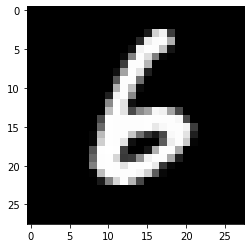

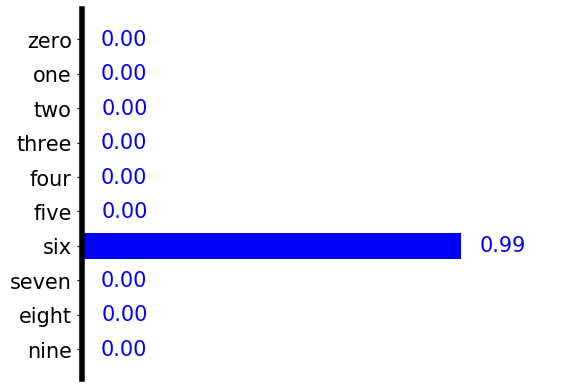

In [13]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# display the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores = net(im.view(1, 784))
prob = F.softmax(scores, dim=1)
utils.show_prob_mnist(prob)